### 1. Install mmdetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

In [ ]:
# Install dependencies
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv==2.1.0"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git -b dev-3.x
%cd mmdetection
%pip install -v -e .

# Back to the root directory
%cd ..

In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info

if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

### 2. Train the model

In [39]:
# !python tools/train.py configs/pascal_voc/faster-rcnn_r50_fpn_1x_voc0712.py      
!python tools/train.py configs/pascal_voc/yolov3.py      

^C


### 3. Inference

In [23]:
import warnings
from mmdet.apis import DetInferencer
warnings.filterwarnings("ignore")

rcnn_inferencer = DetInferencer(
    model='./configs/pascal_voc/faster-rcnn_r50_fpn_1x_voc0712.py', 
    weights='./work_dirs/faster-rcnn_r50_fpn_1x_voc0712/epoch_4.pth',
    device='cpu'
)
rcnn_inferencer('./demo', out_dir='./outputs', no_save_pred=False)

Loads checkpoint by local backend from path: ./work_dirs/faster-rcnn_r50_fpn_1x_voc0712/epoch_4.pth


Output()

{'predictions': [{'labels': [14, 11, 14, 11, 8],
   'scores': [0.9958969354629517,
    0.9182937741279602,
    0.3312239646911621,
    0.13642971217632294,
    0.05360286310315132],
   'bboxes': [[16.854793548583984,
     0.6327012181282043,
     353.0,
     496.7027587890625],
    [57.88056945800781,
     237.27133178710938,
     193.06988525390625,
     356.6759948730469],
    [111.82536315917969, 9.266779899597168, 353.0, 284.8676452636719],
    [31.674373626708984, 167.51327514648438, 336.39453125, 472.81976318359375],
    [0.0, 120.09380340576172, 353.0, 500.0000305175781]]},
  {'labels': [6, 6, 6, 6, 6, 6],
   'scores': [0.9993211030960083,
    0.9983477592468262,
    0.9981716871261597,
    0.9876318573951721,
    0.9387967586517334,
    0.11434633284807205],
   'bboxes': [[13.622654914855957,
     308.8896179199219,
     85.55917358398438,
     363.7727355957031],
    [358.79962158203125,
     326.07073974609375,
     497.112060546875,
     389.7549743652344],
    [231.32275390

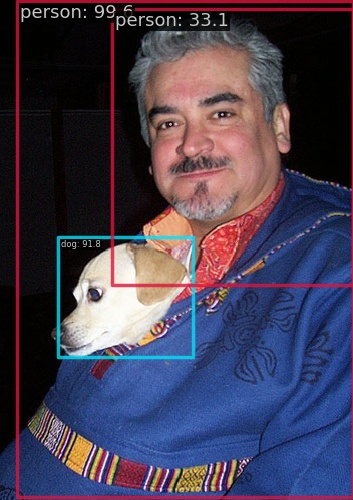

In [24]:
from PIL import Image

Image.open('./outputs/vis/000001.jpg')